## Helmholtz boundary value problem on a rectangle

$$
\mathbb{S}=
\begin{cases}
\Omega = [0, L_x] \times [0, L_y] \\
u_{\text{D}}\vert_{\partial\Omega}=0 \\
f(x,y)=\sin(2\pi x/L_x)\sin(2\pi y/L_y) \\
k = 1 \\
\end{cases}
$$

In [ ]:
import numpy as np
from dolfinx.fem import FunctionSpace

from lucifex.fem import Function, Constant
from lucifex.mesh import rectangle_mesh, mesh_boundary
from lucifex.solver import BoundaryConditions, bvp
from lucifex.viz import plot_colormap
from lucifex.io import write
from lucifex.pde.eigen import helmholtz


Lx = 2.0
Ly = 1.0
Nx = 32
Ny = 32

mesh = rectangle_mesh(Lx, Ly, Nx, Ny)
boundary = mesh_boundary(
        mesh, 
        {
            "left": lambda x: x[0],
            "right": lambda x: x[0] - Lx,
            "lower": lambda x: x[1],
            "upper": lambda x: x[1] - Ly,
        },
)
bcs = BoundaryConditions(('dirichlet', boundary.union, 0.0))

fs = FunctionSpace(mesh, ('P', 1))

u = Function(fs, name='u')
k = Constant(mesh, 1.0, name='k')
s = Function(
    fs, 
    lambda x: np.sin(2 * np.pi * x[0] / Lx) * np.sin(2 * np.pi * x[1] / Ly), 
    name='s',
)
u_solver = bvp(helmholtz, bcs, solution=u)(fs, k, s)
u_solver.solve()

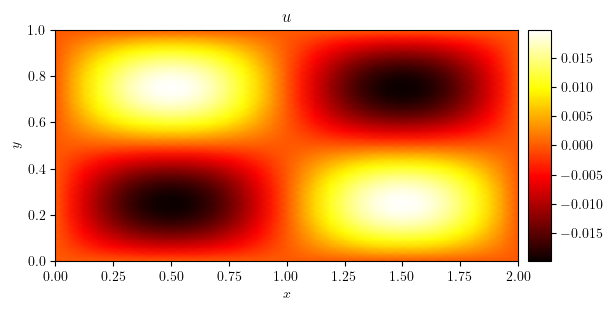

In [ ]:
fig, ax = plot_colormap(u, title=f'$u$')
write(fig, f'A16_helmholtz_bvp', './figures', close=False, pickle=False)